In [ ]:
#packages and figure sizes

import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize
sns.set_context("talk", rc={"font.size": 17,
                            "axes.titlesize": 17,
                            "axes.labelsize": 14,
                            "legend.fontsize": 15,
                            "xtick.labelsize": 13,
                            "ytick.labelsize": 11})

In [ ]:
# Define functions S_i, n_i from Equation 3.5

def S1(tau, x):
  sum = 0
  for i, number in enumerate(x):
    if i < tau:
      sum += number

  return sum

def S2(tau, x):
  sum = 0
  for i, number in enumerate(x):
    if i >= tau:
      sum += number

  return sum

def n1(tau,x):
  return len(x[:tau])



def n2(tau,x):
  return len(x[tau:])

In [ ]:
# Step count data
step_data1 = np.array([6847, 4083, 8058, 2725, 5711, 4078, 3168, 8495, 7368, 2920, 3540, 11465, 9404, 9733, 11113, 12435, 14505, 8247, 18083, 12394, 11561, 20272, 13350, 8050, 9001, 15478, 9311, 13072, 12348, 10643, 16705])

#transformation
x = np.round(step_data1/1000,0)

In [ ]:
# Gamma prior distribution params

alpha = 4
beta = 1/2.5

In [ ]:
# Calculate the sum of the un-normalised PMF over all values of tau
# Note, have to use log for numerical stability as Gamma involves factorials which blow up
# Include reference to this log-exp trick later

log_pi = [0]*31
for tau in np.arange(30):
   log_pi[tau] = (math.lgamma(S1(tau,x) + alpha) - (S1(tau,x) + alpha) * math.log(n1(tau,x) + beta) + math.lgamma(S2(tau,x) + alpha) - (S2(tau,x) + alpha) * math.log(n2(tau,x) + beta))


In [ ]:
ml = max(log_pi)

pi = [0]*31
for i, val in enumerate(log_pi):
  pi[i] = math.exp(val - ml)

Z = np.sum(pi)
for i, val in enumerate(pi):
  pi[i] = val/Z


In [ ]:
pi[11]

np.float64(0.7483318974780171)

Text(0.5, 0, '$\\tau$ (in days)')

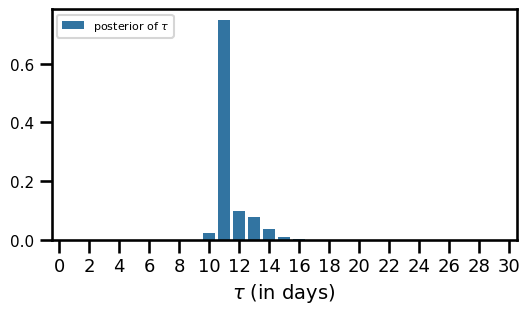

In [ ]:
# Posterior distribution of tau


figsize(6, 3)
sns.barplot(pi,
         label=r"posterior of $\tau$")
plt.xticks(np.arange(31,step=2))
plt.legend(loc="upper left", fontsize=8)
plt.xlabel(r"$\tau$ (in days)")

In [ ]:
# Now for the expectation of lambda_1 and lambda_2

expectation_l1 = 0
for t, val in enumerate(pi):
        shape = S1(t,x) + alpha
        rate = n1(t,x) + beta
        expectation_l1 += val * (shape / rate)


In [ ]:
expectation_l1

np.float64(5.506206766021733)

In [ ]:
expectation_l2 = 0
for t, val in enumerate(pi):
        shape = S2(t,x) + alpha
        rate = n2(t,x) + beta
        expectation_l2 += val * (shape / rate)

In [ ]:
expectation_l2

np.float64(12.240248716439593)